Lasso Problem. L1-regularized problem: minimize

$$\frac{1}{2} \left\| X\beta - y \right\|_2^2 + \lambda \left\| \beta \right\|_1$$

We modify the objective function by adding the regularization term $\lambda \left\| \beta \right\|_1$. This new setup, when solved, effecitvely determines what features are most important in the problem.

As the regularization term is not differentiable, we are unable to use simple methods such as gradient descent to solve the problem. The term
$$\frac{1}{2} \left\| X\beta - y \right\|_2^2$$
is differentiable, but the term
$$ R = \lambda \left\| \beta \right\|_1$$
is not.

Proximal Gradient Descent Iteration:
$$
\beta^{(k+1)} = \text{prox}_{\alpha R}\left( \beta^{(k)} - \alpha_k \nabla f\left( \beta^{(k)} \right) \right)
$$
Where R is the regularization term and $f$ is the differentiable term.
We know
$$\nabla f(\beta) = X^T(X\beta - y)$$
The proximal operator reduces the function but has a "penalty" function so it doesn't get too far away from $\hat{\beta}$.


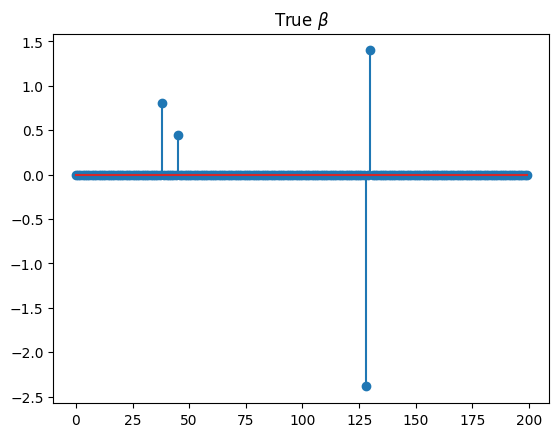

In [ ]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(1)
# synthetic data
N =  40 # training examples
d = 200 # number of features

nnz = 4 # non zero components

m = torch.randperm(d) # selecting 3 components at random and assign them with values
betaTrue = torch.zeros(d)
betaTrue[m[:nnz]] = 5 * torch.randn(nnz)

X = torch.randn(N, d)
ones = torch.ones(X.size(0), 1)  # create a column of ones n rows, 1 col
X_new = torch.cat((ones, X), dim=1)  # concatenate along the column (dim=1)

noise = .1 * torch.randn(N)

y = X @ betaTrue + noise # target

plt.stem(betaTrue)
plt.title("True $\\beta$")
plt.show()

Equation for proximal operator (Solved equation)


$$
\text{prox}_{\lambda \|\cdot\|_1}(v_i) =
\begin{cases}
v_i - \lambda & \text{if } v_i > \lambda \\
0 & \text{if } |v_i| \leq \lambda \\
v_i + \lambda & \text{if } v_i < -\lambda
\end{cases}
$$


In [ ]:


def soft_threshold(beta, alpha): # Beta is values you want to shrink, alpha is "step size" of shrinkage
    return torch.sign(beta) * torch.clamp(torch.abs(beta) - alpha, min=0.0) # moves all values closer to zero and once they get close enough to zero, make them zero (clamp)

def proxL1Norm(betaHat, alpha, penalizeALL=True): #betaHat is current estimate, alpha is step size again
    out = soft_threshold(betaHat, alpha)
    if not penalizeALL: # makes sure intercept is not penalized for linear regression cases
        out[0] = betaHat[0]
    return out

# def clip(beta, alpha):
#     return torch.clamp(beta, -alpha, alpha)

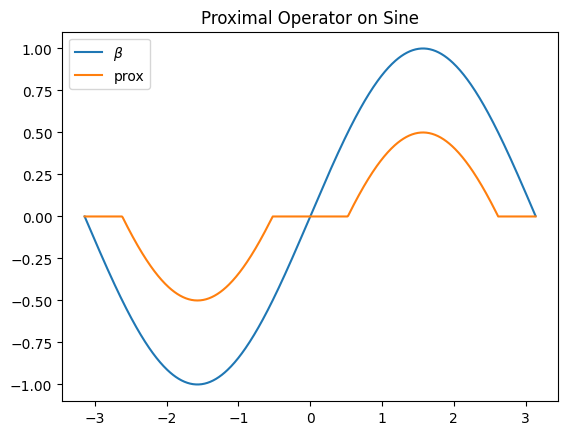

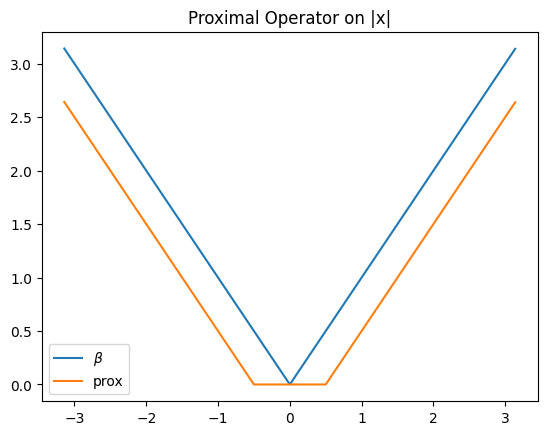

In [ ]:


beta = torch.randn(20)
alpha = 0.5
# clipped = clip(beta, alpha)

# plt.figure()
# plt.plot(beta.numpy(), label='beta')
# plt.plot(clipped.numpy(), label='clipped')
# plt.legend()
# plt.title("Clipping vs Original Beta")
# plt.show()

# test on sin
xVals = torch.arange(-torch.pi, torch.pi, 0.01)
betaHat = torch.sin(xVals)

prox = proxL1Norm(betaHat, alpha)

plt.figure()
plt.plot(xVals.numpy(), betaHat.numpy(), label=r'$\beta$')
plt.plot(xVals.numpy(), prox.numpy(), label='prox')
plt.legend()
plt.title("Proximal Operator on Sine")
plt.show()

# test on |x|
betaHat = torch.abs(xVals)
prox = proxL1Norm(betaHat, alpha)
plt.figure()
plt.plot(xVals.numpy(), betaHat.numpy(), label=r'$\beta$')
plt.plot(xVals.numpy(), prox.numpy(), label='prox')
plt.legend()
plt.title("Proximal Operator on |x|")
plt.show()


In [ ]:

def solveLasso_proxGrad(X, y, lmbda):
    maxIter = 300
    alpha = .005

    N, d = X.shape # N is number of data rows, d is number of features
    beta = torch.zeros(d, dtype=torch.float32) # intitialize coefficients

    costFunVals = torch.zeros(maxIter) # store cost at each iteration

    for t in range(maxIter):
        # gradient of the squared loss
        grad = X.T @ (X @ beta - y)

        #proximal gradient update for L1-penalized loss

        beta = proxL1Norm(beta - alpha * grad, alpha * lmbda)


        # compute Lasso objective
        residual = X @ beta - y
        cost = 0.5 * torch.norm(residual)**2 + lmbda * torch.sum(torch.abs(beta))
        costFunVals[t] = cost

        print(f"Iteration: {t}, Objective function value: {cost.item():.4f}")

    return beta, costFunVals


Iteration: 0, Objective function value: 57.1066
Iteration: 1, Objective function value: 36.7273
Iteration: 2, Objective function value: 30.0011
Iteration: 3, Objective function value: 26.4541
Iteration: 4, Objective function value: 24.3580
Iteration: 5, Objective function value: 22.9583
Iteration: 6, Objective function value: 22.0353
Iteration: 7, Objective function value: 21.3987
Iteration: 8, Objective function value: 20.8955
Iteration: 9, Objective function value: 20.4844
Iteration: 10, Objective function value: 20.1224
Iteration: 11, Objective function value: 19.7936
Iteration: 12, Objective function value: 19.4893
Iteration: 13, Objective function value: 19.2072
Iteration: 14, Objective function value: 18.9379
Iteration: 15, Objective function value: 18.6826
Iteration: 16, Objective function value: 18.4405
Iteration: 17, Objective function value: 18.2093
Iteration: 18, Objective function value: 17.9840
Iteration: 19, Objective function value: 17.7658
Iteration: 20, Objective funct

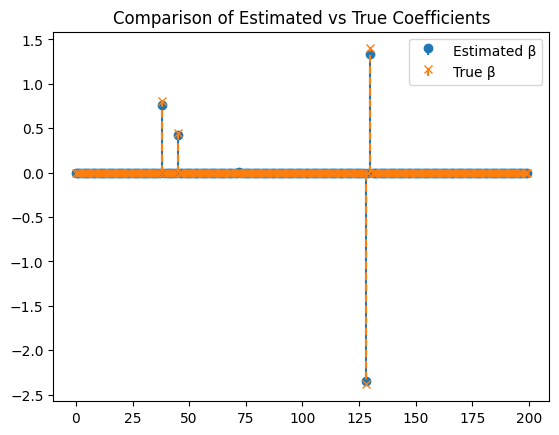

tensor([ 0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,  0.0000e+00,
        -0.0000e+00, -0.0000e+00,  0.0000e+00, -0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -0.0000e+00,
        -0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -0.0000e+00,
         0.0000e+00,  0.0000e+00, -0.0000e+00, -0.0000e+00,  0.0000e+00,
         9.8622e-05,  0.0000e+00,  0.0000e+00,  0.0000e+00, -0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00, -0.0000e+00, -0.0000e+00,
         0.0000e+00,  0.0000e+00, -0.0000e+00,  7.6077e-01,  0.0000e+00,
        -0.0000e+00, -0.0000e+00,  0.0000e+00,  0.0000e+00, -0.0000e+00,
         4.2149e-01, -0.0000e+00,  0.0000e+00,  0.0000e+00, -0.0000e+00,
         0.0000e+00,  0.0000e+00, -0.0000e+00,  0.0000e+00, -0.0000e+00,
        -0.0000e+00, -0.0000e+00,  0.0000e+00, -0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00, -0.0000e+00,  0.0000e+00, -0.0000e+00,
        -0.0000e+00,  0.0000e+00, -0.0000e+00,  0.0

In [ ]:
# test
lmbda = 2
beta, costFunVals = solveLasso_proxGrad(X, y, lmbda)

plt.figure()
plt.stem(beta.numpy(), linefmt='C0-', markerfmt='C0o', basefmt=" ")
plt.stem(betaTrue.numpy(), linefmt='C1--', markerfmt='C1x', basefmt=" ")
plt.legend(['Estimated β', 'True β'])
plt.title('Comparison of Estimated vs True Coefficients')
plt.show()
print(beta)


Now that we have shown the code needed to solve the lasso problem, we can use the ScikitLearn library to solve a real world problem.

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
# diab = load_diabetes()
hous = fetch_california_housing()
X = hous.data
y = hous.target

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Lasso model
lasso = Lasso(alpha=1.0)  # alpha is the regularization strength (have used lambda in other examples)

#fit model
lasso.fit(X_train_scaled, y_train)

# predict on the test set
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.3106960720039365


In [ ]:
#tuning
# Define a range of alpha values to test
alpha_range = [0.01, 0.1, 1, 10, 100]
# Set up grid search
lasso_cv = GridSearchCV(Lasso(), param_grid={'alpha': alpha_range}, cv=5)
lasso_cv.fit(X_train_scaled, y_train)
# Best alpha value
best_alpha = lasso_cv.best_params_['alpha']
print(f"Optimal alpha: {best_alpha}")

Optimal alpha: 0.01


In [ ]:
# Get the coefficients
lasso_coefficients = lasso_cv.best_estimator_.coef_
# Print out the coefficients for each feature
print("Lasso coefficients:", lasso_coefficients)

Lasso coefficients: [ 0.80095744  0.12708701 -0.16275931  0.20620745 -0.         -0.03060176
 -0.79011254 -0.75567379]


In [ ]:
X_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_train, dtype=torch.float32)

lmbda = .01
beta, costFunVals = solveLasso_proxGrad(X_tensor, y_tensor, lmbda, fitIntercept=True)
print(beta)

Iteration: 0, Objective function value: 41049.9414
Iteration: 1, Objective function value: 40670.2422
Iteration: 2, Objective function value: 40516.1094
Iteration: 3, Objective function value: 40407.2031
Iteration: 4, Objective function value: 40318.3594
Iteration: 5, Objective function value: 40242.5703
Iteration: 6, Objective function value: 40176.9141
Iteration: 7, Objective function value: 40119.7891
Iteration: 8, Objective function value: 40069.9766
Iteration: 9, Objective function value: 40026.5273
Iteration: 10, Objective function value: 39988.5977
Iteration: 11, Objective function value: 39955.4531
Iteration: 12, Objective function value: 39926.4883
Iteration: 13, Objective function value: 39901.1914
Iteration: 14, Objective function value: 39879.0547
Iteration: 15, Objective function value: 39859.7148
Iteration: 16, Objective function value: 39842.7734
Iteration: 17, Objective function value: 39827.9336
Iteration: 18, Objective function value: 39814.9648
Iteration: 19, Objecti